There are no NAN in browse_history table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import os
import gc

b_history_header = ["user_id","bh_time","browse_behavior","browse_num"]
l_time_header = ["user_id","grant_time"]

basis_path = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
l_time_path = os.path.join(basis_path,"loan_time_train.txt")
b_history_path = os.path.join(basis_path,"browse_history_train.txt")

In [6]:
gc.collect()

67

In [2]:
browse_history_train = pd.read_table(b_history_path,sep = ",",header = None,names = b_history_header)
loan_time_train = pd.read_table(l_time_path,sep = ",",header = None,names = l_time_header)
browse_history_train.iloc[:3,:]

user_id     bh_time  browse_behavior  browse_num
0    34801  5926003545              173           1
1    34801  5926003545              164           4
2    34801  5926003545               38           7

In [111]:
browse_history_train.isnull().any()

user_id            False
bh_time            False
browse_behavior    False
browse_num         False
dtype: bool

In [24]:
print(len(browse_history_train["browse_behavior"].unique()))
print(browse_history_train["browse_behavior"].max())
browse_history_train["browse_behavior"].unique()


214
216


array([173, 164,  38,  45, 110, 118,  50, 139,  82, 101,  53, 190,  80,
       120, 189, 213, 201,  44,  31,  41, 155,   6, 167, 157, 161, 109,
       162, 143,  90,  35,  23, 104, 188,  76,  91, 194,  10,  25, 163,
        28, 200, 207, 210,  12,  15,  75, 148,  57,  39, 209,  20,  51,
        56, 180,  13, 130,  46, 150, 151, 152, 153,  96, 119,  55, 103,
        89,  60, 133,  59, 172, 175, 146, 147, 116, 149, 197, 193,   7,
       195, 107, 105, 108,  36,  34, 106, 136,  43,  42,  97,  11,  77,
       178,  88, 191, 185,  64,  37, 123, 192, 184,  94, 129, 214,  66,
        86,   8,   9, 138, 166, 204,  33,  62, 144,  61, 134, 137,  29,
         4, 203,  85, 208,  74,  78, 126,  84, 140,  32, 202,  40, 198,
        49, 159, 165, 170, 176,  92,  26, 196, 199,   3,  14,  22,  73,
       122,  48, 177, 181, 215, 112, 160, 158, 131, 169, 205, 174, 128,
        87,  83,  21, 113,  16, 114, 102, 111, 121,  19, 216, 132, 135,
       125,  30,  27,   2, 145,  54,  67,  24, 168, 154, 206, 21

delete duplicated data,then deal with data for before and after loan time

1
1


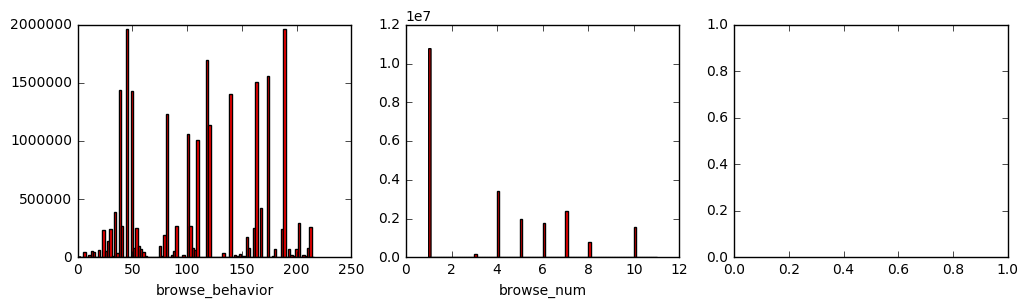

In [26]:
def plot_hist(conti_col,table):
    r = int(np.ceil(len(conti_col)/3))
    c = 3
    fig, axes = plt.subplots(r,c,figsize = (12,3*r))
    col = 0
    print(r)
    if r > 1:
        for i in range(r):
            for j in range(c):
                if col < len(conti_col):
                    axes[i,j].hist(table[conti_col[col]],bins = 100,color = "r")
                    axes[i,j].set_xlabel(conti_col[col])  
                    #axes[i,j].set_yticks("")
                    #axes[i,j].set_ylabel("total_count")
                    #ax.hist(user_info_train["gender"],bins = 3,normed = False, histtype = "bar", facecolor = "r",bottom = 4)
                    col = col + 1
                else:
                    break
    else:
        print(r)
        for j in range(c):
            if col < len(conti_col):
                axes[j].hist(table[conti_col[col]],bins = 100,color = "r")
                axes[j].set_xlabel(conti_col[col])  
                col = col + 1
            else:
                break
    plt.subplots_adjust()
    plt.show()
plot_hist(b_history_header[2:],browse_history_train)

In [41]:
browse_history_train[browse_history_train["browse_behavior"] == 101]["browse_num"].unique()

array([1], dtype=int64)

There are too many categories for variable "browse_behavior"，in case the table become too sparse，just try making variable "browse_num" convert to virtual variable firstly.

In [3]:
#user_info_train_virtual = pd.get_dummies(user_info_train,columns = u_info_header[1:])
all_time_browse_temp = pd.get_dummies(browse_history_train,columns = b_history_header[3:])

#browse_gb1 = all_time_browse_result.groupby("user_id")
all_time_browse_temp.iloc[0:3,:]

user_id     bh_time  browse_behavior  browse_num_1  browse_num_2  \
0    34801  5926003545              173           1.0           0.0   
1    34801  5926003545              164           0.0           0.0   
2    34801  5926003545               38           0.0           0.0   

   browse_num_3  browse_num_4  browse_num_5  browse_num_6  browse_num_7  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           1.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           1.0   

   browse_num_8  browse_num_9  browse_num_10  browse_num_11  
0           0.0           0.0            0.0            0.0  
1           0.0           0.0            0.0            0.0  
2           0.0           0.0            0.0            0.0

In [4]:
def make_new_cols(pre,suf,cols,data_name,main_table):
    gb = data_name.groupby("user_id",as_index = False)
    for col_name in cols:
        x = gb[col_name].agg({pre+col_name+suf:suf})
        main_table[pre+col_name+suf] = x.iloc[:,1]
    return main_table
bro_temp_col = ["browse_behavior","browse_num_1","browse_num_2","browse_num_3","browse_num_4","browse_num_5","browse_num_6","browse_num_7",
                "browse_num_8","browse_num_9","browse_num_10","browse_num_11"]

In [112]:
len(all_time_browse_temp)

22919547

In [9]:
m_loan_time_train = loan_time_train.copy(deep = True)
#dup_bill_detail_train["duplicated_counts"] = x1.iloc[:,1]

bro_all_time_table1 = make_new_cols("bro_all_","sum",bro_temp_col,all_time_browse_temp,m_loan_time_train.iloc[:,0:1])
bro_all_time_table2 = make_new_cols("bro_all_","count",["browse_behavior"],all_time_browse_temp,m_loan_time_train.iloc[:,0:1])
bro_all_time_table3 = make_new_cols("bro_all_","std",["browse_behavior"],all_time_browse_temp,m_loan_time_train.iloc[:,0:1])
bro_all_time_table4 = make_new_cols("bro_all_","max",["browse_behavior"],all_time_browse_temp,m_loan_time_train.iloc[:,0:1])

bro_all_time_result = pd.merge(bro_all_time_table1,bro_all_time_table2,how = "inner",on = "user_id")
bro_all_time_result = pd.merge(bro_all_time_result,bro_all_time_table3,how = "inner",on = "user_id")
bro_all_time_result = pd.merge(bro_all_time_result,bro_all_time_table4,how = "inner",on = "user_id")

bro_all_time_result.to_csv(os.path.join(basis_path,"bill_temp_table\\bro_all_time_result.csv"),index = None,header = True,encoding = "utf8")

read_bro_all_time_result = pd.read_csv(os.path.join(basis_path,"bill_temp_table\\bro_all_time_result.csv"))
read_bro_all_time_result.iloc[:3,:]
                                       

user_id  bro_all_browse_behaviorsum  bro_all_browse_num_1sum  \
0        1                    151500.0                    540.0   
1        2                     38586.0                    174.0   
2        3                     38764.0                    164.0   

   bro_all_browse_num_2sum  bro_all_browse_num_3sum  bro_all_browse_num_4sum  \
0                      0.0                     90.0                    150.0   
1                      0.0                      0.0                     48.0   
2                      0.0                      4.0                     64.0   

   bro_all_browse_num_5sum  bro_all_browse_num_6sum  bro_all_browse_num_7sum  \
0                    105.0                    135.0                    105.0   
1                     30.0                     24.0                     42.0   
2                     36.0                     32.0                     36.0   

   bro_all_browse_num_8sum  bro_all_browse_num_9sum  bro_all_browse_num_10sum  \
0                    105.0                      0.0                      75.0   
1                      0.0                      0.0                      24.0   
2                      4.0                      0.0                      24.0   

   bro_all_browse_num_11sum  bro_all_browse_behaviorcount  \
0                       0.0                        1305.0   
1                       0.0                         342.0   
2                       0.0                         364.0   

   bro_all_browse_behaviorstd  bro_all_browse_behaviormax  
0                   58.230548                       213.0  
1                   50.366559                       190.0  
2                   54.240841                       213.0

In [5]:
merge_all_browse = pd.merge(all_time_browse_temp,loan_time_train,how = "left", on = "user_id")
print(len(merge_all_browse[merge_all_browse["bh_time"]>merge_all_browse["grant_time"]]))
print(len(merge_all_browse[merge_all_browse["bh_time"]<merge_all_browse["grant_time"]]))
print(len(merge_all_browse[merge_all_browse["bh_time"]==merge_all_browse["grant_time"]]))
aft_all_browse = merge_all_browse[merge_all_browse["bh_time"]>merge_all_browse["grant_time"]]
bef_all_browse = merge_all_browse[merge_all_browse["bh_time"]<merge_all_browse["grant_time"]]

1800104
21119443
0


In [7]:
bro_all_aft_eachu_dup = aft_all_browse[aft_all_browse.duplicated()]
print(len(bro_all_aft_eachu_dup))
bro_all_aft_eachu_dup_counts = bro_all_aft_eachu_dup.groupby("user_id")["browse_behavior"].count()
bro_all_bef_eachu_dup = bef_all_browse[bef_all_browse.duplicated()]
bro_all_bef_eachu_dup_counts = bro_all_bef_eachu_dup.groupby("user_id")["browse_behavior"].count()


1560856


In [23]:
m_loan_time_train = loan_time_train.copy(deep = True)

bro_all_bef_table1 = make_new_cols("bro_all_bef_","sum",bro_temp_col,bef_all_browse,m_loan_time_train.iloc[:,0:1])
bro_all_bef_table2 = make_new_cols("bro_all_bef_","count",["browse_behavior"],bef_all_browse,m_loan_time_train.iloc[:,0:1])
bro_all_bef_table3 = make_new_cols("bro_all_bef_","std",["browse_behavior"],bef_all_browse,m_loan_time_train.iloc[:,0:1])
bro_all_bef_table4 = make_new_cols("bro_all_bef_","max",["browse_behavior"],bef_all_browse,m_loan_time_train.iloc[:,0:1])

bro_all_bef_result = pd.merge(bro_all_bef_table1,bro_all_bef_table2,how = "inner",on = "user_id")
bro_all_bef_result = pd.merge(bro_all_bef_result,bro_all_bef_table3,how = "inner",on = "user_id")
bro_all_bef_result = pd.merge(bro_all_bef_result,bro_all_bef_table4,how = "inner",on = "user_id")

bro_all_bef_result["bro_all_bef_counts"] = bef_all_browse.groupby("user_id")["browse_behavior"].count()
bro_all_bef_result["bro_all_bef_dup_counts"] = bro_all_bef_eachu_dup_counts
bro_all_bef_result["bro_all_bef_counts"].replace(np.nan,0,inplace = True)
bro_all_bef_result["bro_all_bef_dup_counts"].replace(np.nan,0,inplace = True)

bro_all_bef_result.to_csv(os.path.join(basis_path,"browse_temp_table\\bro_all_bef_result.csv"),index = None,header = True,encoding = "utf8")
read_bro_all_bef_result = pd.read_csv(os.path.join(basis_path,"browse_temp_table\\bro_all_bef_result.csv"))
read_bro_all_bef_result.iloc[:5,:]

user_id  bro_all_bef_browse_behaviorsum  bro_all_bef_browse_num_1sum  \
0        1                        151500.0                        540.0   
1        2                         38586.0                        174.0   
2        3                         38764.0                        164.0   
3        4                          1650.0                          0.0   
4        5                        112420.0                        462.0   

   bro_all_bef_browse_num_2sum  bro_all_bef_browse_num_3sum  \
0                          0.0                         90.0   
1                          0.0                          0.0   
2                          0.0                          4.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   bro_all_bef_browse_num_4sum  bro_all_bef_browse_num_5sum  \
0                        150.0                        105.0   
1                         48.0                         30.0   
2                         64.0                         36.0   
3                          0.0                          0.0   
4                        140.0                         98.0   

   bro_all_bef_browse_num_6sum  bro_all_bef_browse_num_7sum  \
0                        135.0                        105.0   
1                         24.0                         42.0   
2                         32.0                         36.0   
3                          0.0                         15.0   
4                         98.0                        112.0   

   bro_all_bef_browse_num_8sum  bro_all_bef_browse_num_9sum  \
0                        105.0                          0.0   
1                          0.0                          0.0   
2                          4.0                          0.0   
3                          0.0                          0.0   
4                         14.0                          0.0   

   bro_all_bef_browse_num_10sum  bro_all_bef_browse_num_11sum  \
0                          75.0                           0.0   
1                          24.0                           0.0   
2                          24.0                           0.0   
3                           0.0                           0.0   
4                          84.0                           0.0   

   bro_all_bef_browse_behaviorcount  bro_all_bef_browse_behaviorstd  \
0                            1305.0                       58.230548   
1                             342.0                       50.366559   
2                             364.0                       54.240841   
3                              15.0                        0.000000   
4                            1008.0                       54.965108   

   bro_all_bef_browse_behaviormax  bro_all_bef_counts  bro_all_bef_dup_counts  
0                           213.0                 0.0                     0.0  
1                           190.0                 0.0                     0.0  
2                           213.0              1305.0                  1218.0  
3                           110.0               342.0                   287.0  
4                           213.0               364.0                   317.0

In [22]:
bro_all_aft_table1 = make_new_cols("bro_all_aft_","sum",bro_temp_col,aft_all_browse,m_loan_time_train.iloc[:,0:1])
bro_all_aft_table2 = make_new_cols("bro_all_aft_","count",["browse_behavior"],aft_all_browse,m_loan_time_train.iloc[:,0:1])
bro_all_aft_table3 = make_new_cols("bro_all_aft_","std",["browse_behavior"],aft_all_browse,m_loan_time_train.iloc[:,0:1])
bro_all_aft_table4 = make_new_cols("bro_all_aft_","max",["browse_behavior"],aft_all_browse,m_loan_time_train.iloc[:,0:1])

bro_all_aft_result = pd.merge(bro_all_aft_table1,bro_all_aft_table2,how = "inner",on = "user_id")
bro_all_aft_result = pd.merge(bro_all_aft_result,bro_all_aft_table3,how = "inner",on = "user_id")
bro_all_aft_result = pd.merge(bro_all_aft_result,bro_all_aft_table4,how = "inner",on = "user_id")

bro_all_aft_result["bro_all_aft_counts"] = aft_all_browse.groupby("user_id")["browse_behavior"].count()
bro_all_aft_result["bro_all_aft_dup_counts"] = bro_all_aft_eachu_dup_counts
bro_all_aft_result["bro_all_aft_counts"].replace(np.nan,0,inplace = True)
bro_all_aft_result["bro_all_aft_dup_counts"].replace(np.nan,0,inplace = True)

bro_all_aft_result.to_csv(os.path.join(basis_path,"browse_temp_table\\bro_all_aft_result.csv"),index = None,header = True,encoding = "utf8")
read_bro_all_aft_result = pd.read_csv(os.path.join(basis_path,"browse_temp_table\\bro_all_aft_result.csv"))
read_bro_all_aft_result.iloc[:3,:]

user_id  bro_all_aft_browse_behaviorsum  bro_all_aft_browse_num_1sum  \
0        1                         14770.0                         49.0   
1        2                          1533.0                         14.0   
2        3                          1645.0                         10.0   

   bro_all_aft_browse_num_2sum  bro_all_aft_browse_num_3sum  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   bro_all_aft_browse_num_4sum  bro_all_aft_browse_num_5sum  \
0                         28.0                         14.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   bro_all_aft_browse_num_6sum  bro_all_aft_browse_num_7sum  \
0                          7.0                          7.0   
1                          0.0                          0.0   
2                          0.0                          5.0   

   bro_all_aft_browse_num_8sum  bro_all_aft_browse_num_9sum  \
0                          7.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   bro_all_aft_browse_num_10sum  bro_all_aft_browse_num_11sum  \
0                           7.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   bro_all_aft_browse_behaviorcount  bro_all_aft_browse_behaviorstd  \
0                             119.0                       60.925236   
1                              14.0                        8.820867   
2                              15.0                        7.187953   

   bro_all_aft_browse_behaviormax  bro_all_aft_counts  bro_all_aft_dup_counts  
0                           201.0                 0.0                     0.0  
1                           118.0                 0.0                     0.0  
2                           118.0                 0.0                     0.0

In [14]:
len(browse_history_train[browse_history_train.duplicated()])

20342821

In [15]:
len(browse_history_train)

22919547

In [16]:
len(browse_history_train.drop_duplicates())

2576726

deal with drop-duplicated data

In [19]:
unique_browse_history = browse_history_train.drop_duplicates()
unique_time_browse_temp = pd.get_dummies(unique_browse_history,columns = b_history_header[3:])
bro_unique_time_table1 = make_new_cols("bro_unique_","sum",bro_temp_col,unique_time_browse_temp,m_loan_time_train.iloc[:,0:1])
bro_unique_time_table2 = make_new_cols("bro_unique_","count",["browse_behavior"],unique_time_browse_temp,m_loan_time_train.iloc[:,0:1])
bro_unique_time_table3 = make_new_cols("bro_unique_","std",["browse_behavior"],unique_time_browse_temp,m_loan_time_train.iloc[:,0:1])
bro_unique_time_result = pd.merge(bro_unique_time_table1,bro_unique_time_table2,how = "inner",on = "user_id")
bro_unique_time_result = pd.merge(bro_unique_time_result,bro_unique_time_table3,how = "inner",on = "user_id")
bro_unique_time_result.iloc[0:3,:]

user_id  bro_all_browse_behaviorsum  bro_all_browse_num_1sum  \
0        1                     10100.0                     36.0   
1        2                      6140.0                     27.0   
2        3                      5039.0                     21.0   

   bro_all_browse_num_2sum  bro_all_browse_num_3sum  bro_all_browse_num_4sum  \
0                      0.0                      6.0                     10.0   
1                      0.0                      0.0                      8.0   
2                      0.0                      1.0                      8.0   

   bro_all_browse_num_5sum  bro_all_browse_num_6sum  bro_all_browse_num_7sum  \
0                      7.0                      9.0                      7.0   
1                      5.0                      4.0                      7.0   
2                      5.0                      4.0                      5.0   

   bro_all_browse_num_8sum  bro_all_browse_num_9sum  bro_all_browse_num_10sum  \
0                      7.0                      0.0                       5.0   
1                      0.0                      0.0                       4.0   
2                      1.0                      0.0                       2.0   

   bro_all_browse_num_11sum  bro_all_browse_behaviorcount  \
0                       0.0                          87.0   
1                       0.0                          55.0   
2                       0.0                          47.0   

   bro_all_browse_behaviorstd  
0                   58.545675  
1                   50.999043  
2                   54.770246

In [20]:
bro_unique_time_result.to_csv(basis_path+"browse_temp_table\\bro_unique_time_result.csv",index = None,header = True,encoding = "utf8")
read_bro_unique_time_result = pd.read_csv(basis_path+"browse_temp_table\\bro_unique_time_result.csv")
print(len(read_bro_unique_time_result))
read_bro_unique_time_result.iloc[0:3,:]

55596


user_id  bro_all_browse_behaviorsum  bro_all_browse_num_1sum  \
0        1                     10100.0                     36.0   
1        2                      6140.0                     27.0   
2        3                      5039.0                     21.0   

   bro_all_browse_num_2sum  bro_all_browse_num_3sum  bro_all_browse_num_4sum  \
0                      0.0                      6.0                     10.0   
1                      0.0                      0.0                      8.0   
2                      0.0                      1.0                      8.0   

   bro_all_browse_num_5sum  bro_all_browse_num_6sum  bro_all_browse_num_7sum  \
0                      7.0                      9.0                      7.0   
1                      5.0                      4.0                      7.0   
2                      5.0                      4.0                      5.0   

   bro_all_browse_num_8sum  bro_all_browse_num_9sum  bro_all_browse_num_10sum  \
0                      7.0                      0.0                       5.0   
1                      0.0                      0.0                       4.0   
2                      1.0                      0.0                       2.0   

   bro_all_browse_num_11sum  bro_all_browse_behaviorcount  \
0                       0.0                          87.0   
1                       0.0                          55.0   
2                       0.0                          47.0   

   bro_all_browse_behaviorstd  
0                   58.545675  
1                   50.999043  
2                   54.770246

In [6]:
all_time_browse_temp.iloc[:3,:]

user_id     bh_time  browse_behavior  browse_num_1  browse_num_2  \
0    34801  5926003545              173           1.0           0.0   
1    34801  5926003545              164           0.0           0.0   
2    34801  5926003545               38           0.0           0.0   

   browse_num_3  browse_num_4  browse_num_5  browse_num_6  browse_num_7  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           1.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           1.0   

   browse_num_8  browse_num_9  browse_num_10  browse_num_11  
0           0.0           0.0            0.0            0.0  
1           0.0           0.0            0.0            0.0  
2           0.0           0.0            0.0            0.0

In [ ]:
gc.collect()
merge_all_time_browse_temp = pd.merge(all_time_browse_temp,loan_time_train,how = "left",on = "user_id")

#unique_bro_his.iloc[:3,:]
merge_all_time_browse_temp.iloc[:3,:]

In [28]:
unique_bro_his = merge_all_time_browse_temp.drop_duplicates()


NameError: name 'merge_all_time_browse_temp' is not defined

In [15]:
print(len(merge_all_time_browse_temp))
print(len(merge_all_time_browse_temp[merge_all_time_browse_temp["bh_time"]>merge_all_time_browse_temp["grant_time"]]))
print(len(merge_all_time_browse_temp[merge_all_time_browse_temp["bh_time"]<merge_all_time_browse_temp["grant_time"]]))
print(len(merge_all_time_browse_temp[merge_all_time_browse_temp["bh_time"]==merge_all_time_browse_temp["grant_time"]]))
print("******************************************")
print(len(merge_all_time_browse_temp.duplicated()))
print(len(unique_bro_his))
print(len(unique_bro_his[unique_bro_his["bh_time"]>unique_bro_his["grant_time"]]))
print(len(unique_bro_his[unique_bro_his["bh_time"]<unique_bro_his["grant_time"]]))
print(len(unique_bro_his[unique_bro_his["bh_time"]==unique_bro_his["grant_time"]]))


22919547
1800104
21119443
0
******************************************
22919547
2576726
239248
2337478
0


deal with drop-duplicated data in two conditions

In [27]:
aft_unique_bro_his = unique_bro_his[unique_bro_his["bh_time"]>unique_bro_his["grant_time"]]
bef_unique_bro_his = unique_bro_his[unique_bro_his["bh_time"]<unique_bro_his["grant_time"]]
aft_unique_bro_his.iloc[:3,:]

NameError: name 'unique_bro_his' is not defined

In [81]:
aft_loan_unique_bro_his.iloc[:3,:]

user_id     bh_time  browse_behavior  browse_num_1  browse_num_2  \
9124    52739  5931652629              190           0.0           0.0   
9125    52739  5931652629               50           0.0           0.0   
9126    52739  5931652629              189           1.0           0.0   

      browse_num_3  browse_num_4  browse_num_5  browse_num_6  browse_num_7  \
9124           0.0           0.0           0.0           0.0           0.0   
9125           0.0           0.0           0.0           1.0           0.0   
9126           0.0           0.0           0.0           0.0           0.0   

      browse_num_8  browse_num_9  browse_num_10  browse_num_11  grant_time  
9124           0.0           0.0            1.0            0.0  5931617487  
9125           0.0           0.0            0.0            0.0  5931617487  
9126           0.0           0.0            0.0            0.0  5931617487

In [97]:
cols = aft_loan_unique_bro_his.columns[1:].copy(deep = True)
def modify_colname(table,colnames,prefix):
    for column in colnames:#distinguishi the differences between .columns and rename,the chain effect for .columns
        table.rename(columns = ({column:prefix+column}),inplace = True)
modify_colname(aft_loan_unique_bro_his,cols,"browse_aft_loan_")
aft_loan_unique_bro_his.iloc[:3,:]

user_id  browse_aft_loan_bh_time  browse_aft_loan_browse_behavior  \
9124    52739               5931652629                              190   
9125    52739               5931652629                               50   
9126    52739               5931652629                              189   

      browse_aft_loan_browse_num_1  browse_aft_loan_browse_num_2  \
9124                           0.0                           0.0   
9125                           0.0                           0.0   
9126                           1.0                           0.0   

      browse_aft_loan_browse_num_3  browse_aft_loan_browse_num_4  \
9124                           0.0                           0.0   
9125                           0.0                           0.0   
9126                           0.0                           0.0   

      browse_aft_loan_browse_num_5  browse_aft_loan_browse_num_6  \
9124                           0.0                           0.0   
9125                           0.0                           1.0   
9126                           0.0                           0.0   

      browse_aft_loan_browse_num_7  browse_aft_loan_browse_num_8  \
9124                           0.0                           0.0   
9125                           0.0                           0.0   
9126                           0.0                           0.0   

      browse_aft_loan_browse_num_9  browse_aft_loan_browse_num_10  \
9124                           0.0                            1.0   
9125                           0.0                            0.0   
9126                           0.0                            0.0   

      browse_aft_loan_browse_num_11  browse_aft_loan_grant_time  
9124                            0.0                  5931617487  
9125                            0.0                  5931617487  
9126                            0.0                  5931617487

In [98]:
modify_colname(before_loan_unique_bro_his,cols,"browse_bef_loan_")
before_loan_unique_bro_his.iloc[:3,:]

user_id  browse_bef_loan_bh_time  browse_bef_loan_browse_behavior  \
0    34801               5926003545                              173   
1    34801               5926003545                              164   
2    34801               5926003545                               38   

   browse_bef_loan_browse_num_1  browse_bef_loan_browse_num_2  \
0                           1.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   browse_bef_loan_browse_num_3  browse_bef_loan_browse_num_4  \
0                           0.0                           0.0   
1                           0.0                           1.0   
2                           0.0                           0.0   

   browse_bef_loan_browse_num_5  browse_bef_loan_browse_num_6  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   browse_bef_loan_browse_num_7  browse_bef_loan_browse_num_8  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           1.0                           0.0   

   browse_bef_loan_browse_num_9  browse_bef_loan_browse_num_10  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   

   browse_bef_loan_browse_num_11  browse_bef_loan_grant_time  
0                            0.0                  5929543887  
1                            0.0                  5929543887  
2                            0.0                  5929543887

In [26]:
m_loan_time_train = loan_time_train.copy(deep = True)
#dup_bill_detail_train["duplicated_counts"] = x1.iloc[:,1]


before_loan_unique_bro_table1 = make_new_cols("bro_bef_unique_","sum",bro_temp_col,bef_unique_bro_his,m_loan_time_train.iloc[:,0:1])
before_loan_unique_bro_table2 = make_new_cols("bro_bef_unique_","count",["browse_behavior"],bef_unique_bro_his,m_loan_time_train.iloc[:,0:1])
before_loan_unique_bro_table3 = make_new_cols("bro_bef_unique_","std",["browse_behavior"],bef_unique_bro_his,m_loan_time_train.iloc[:,0:1])
before_loan_unique_bro_result = pd.merge(before_loan_unique_bro_table1,before_loan_unique_bro_table2,how = "inner",on = "user_id")
before_loan_unique_bro_result = pd.merge(before_loan_unique_bro_result,before_loan_unique_bro_table3,how = "inner",on = "user_id")
before_loan_unique_bro_result.iloc[0:3,:]

NameError: name 'bef_unique_bro_his' is not defined

In [104]:
before_loan_unique_bro_result.to_csv(basis_path+"browse_temp_table\\before_loan_unique_bro_result.csv",index = None,header = True,encoding = "utf8")
read_before_loan_unique_bro_result = pd.read_csv(basis_path+"browse_temp_table\\before_loan_unique_bro_result.csv")
read_before_loan_unique_bro_result.iloc[0:3,:]

user_id  browse_bef_loan_browse_behaviorsum  \
0        1                             10100.0   
1        2                              6140.0   
2        3                              5039.0   

   browse_bef_loan_browse_num_1sum  browse_bef_loan_browse_num_2sum  \
0                             36.0                              0.0   
1                             27.0                              0.0   
2                             21.0                              0.0   

   browse_bef_loan_browse_num_3sum  browse_bef_loan_browse_num_4sum  \
0                              6.0                             10.0   
1                              0.0                              8.0   
2                              1.0                              8.0   

   browse_bef_loan_browse_num_5sum  browse_bef_loan_browse_num_6sum  \
0                              7.0                              9.0   
1                              5.0                              4.0   
2                              5.0                              4.0   

   browse_bef_loan_browse_num_7sum  browse_bef_loan_browse_num_8sum  \
0                              7.0                              7.0   
1                              7.0                              0.0   
2                              5.0                              1.0   

   browse_bef_loan_browse_num_9sum  browse_bef_loan_browse_num_10sum  \
0                              0.0                               5.0   
1                              0.0                               4.0   
2                              0.0                               2.0   

   browse_bef_loan_browse_num_11sum  browse_bef_loan_browse_behaviorcount  \
0                               0.0                                  87.0   
1                               0.0                                  55.0   
2                               0.0                                  47.0   

   browse_bef_loan_browse_behaviorstd  
0                           58.545675  
1                           50.999043  
2                           54.770246

In [105]:
aft_temp_col = ["browse_aft_loan_browse_behavior","browse_aft_loan_browse_num_1","browse_aft_loan_browse_num_2","browse_aft_loan_browse_num_3",
                "browse_aft_loan_browse_num_4","browse_aft_loan_browse_num_5","browse_aft_loan_browse_num_6","browse_aft_loan_browse_num_7",
                "browse_aft_loan_browse_num_8","browse_aft_loan_browse_num_9","browse_aft_loan_browse_num_10","browse_aft_loan_browse_num_11"]    
aft_loan_unique_bro_table1 = make_new_cols("","sum",aft_temp_col,aft_loan_unique_bro_his,m_loan_time_train.iloc[:,0:1])
aft_loan_unique_bro_table2 = make_new_cols("","count",["browse_aft_loan_browse_behavior"],aft_loan_unique_bro_his,m_loan_time_train.iloc[:,0:1])
aft_loan_unique_bro_table3 = make_new_cols("","std",["browse_aft_loan_browse_behavior"],aft_loan_unique_bro_his,m_loan_time_train.iloc[:,0:1])
aft_loan_unique_bro_result = pd.merge(aft_loan_unique_bro_table1,aft_loan_unique_bro_table2,how = "inner",on = "user_id")
aft_loan_unique_bro_result = pd.merge(aft_loan_unique_bro_result,aft_loan_unique_bro_table3,how = "inner",on = "user_id")
aft_loan_unique_bro_result.iloc[0:3,:]

user_id  browse_aft_loan_browse_behaviorsum  \
0        1                              2110.0   
1        2                               219.0   
2        3                               329.0   

   browse_aft_loan_browse_num_1sum  browse_aft_loan_browse_num_2sum  \
0                              7.0                              0.0   
1                              2.0                              0.0   
2                              2.0                              0.0   

   browse_aft_loan_browse_num_3sum  browse_aft_loan_browse_num_4sum  \
0                              0.0                              4.0   
1                              0.0                              0.0   
2                              0.0                              0.0   

   browse_aft_loan_browse_num_5sum  browse_aft_loan_browse_num_6sum  \
0                              2.0                              1.0   
1                              0.0                              0.0   
2                              0.0                              0.0   

   browse_aft_loan_browse_num_7sum  browse_aft_loan_browse_num_8sum  \
0                              1.0                              1.0   
1                              0.0                              0.0   
2                              1.0                              0.0   

   browse_aft_loan_browse_num_9sum  browse_aft_loan_browse_num_10sum  \
0                              0.0                               1.0   
1                              0.0                               0.0   
2                              0.0                               0.0   

   browse_aft_loan_browse_num_11sum  browse_aft_loan_browse_behaviorcount  \
0                               0.0                                  17.0   
1                               0.0                                   2.0   
2                               0.0                                   3.0   

   browse_aft_loan_browse_behaviorstd  
0                           62.535872  
1                           12.020815  
2                            8.504901

In [106]:
aft_loan_unique_bro_result.to_csv(basis_path+"browse_temp_table\\aft_loan_unique_bro_result.csv",index = None,header = True,encoding = "utf8")
read_aft_loan_unique_bro_result = pd.read_csv(basis_path+"browse_temp_table\\aft_loan_unique_bro_result.csv")
read_aft_loan_unique_bro_result.iloc[0:3,:]

user_id  browse_aft_loan_browse_behaviorsum  \
0        1                              2110.0   
1        2                               219.0   
2        3                               329.0   

   browse_aft_loan_browse_num_1sum  browse_aft_loan_browse_num_2sum  \
0                              7.0                              0.0   
1                              2.0                              0.0   
2                              2.0                              0.0   

   browse_aft_loan_browse_num_3sum  browse_aft_loan_browse_num_4sum  \
0                              0.0                              4.0   
1                              0.0                              0.0   
2                              0.0                              0.0   

   browse_aft_loan_browse_num_5sum  browse_aft_loan_browse_num_6sum  \
0                              2.0                              1.0   
1                              0.0                              0.0   
2                              0.0                              0.0   

   browse_aft_loan_browse_num_7sum  browse_aft_loan_browse_num_8sum  \
0                              1.0                              1.0   
1                              0.0                              0.0   
2                              1.0                              0.0   

   browse_aft_loan_browse_num_9sum  browse_aft_loan_browse_num_10sum  \
0                              0.0                               1.0   
1                              0.0                               0.0   
2                              0.0                               0.0   

   browse_aft_loan_browse_num_11sum  browse_aft_loan_browse_behaviorcount  \
0                               0.0                                  17.0   
1                               0.0                                   2.0   
2                               0.0                                   3.0   

   browse_aft_loan_browse_behaviorstd  
0                           62.535872  
1                           12.020815  
2                            8.504901